In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam



In [ ]:
train_dir = 'D:\\dataset\\train'
test_dir = 'D:\\dataset\\test'

In [ ]:
num_train = 0
counts = {}
for root, dirs, files in os.walk(train_dir):
    if not dirs:
        print(f'{root}: {len(files)}')
        counts[root] = len(files)
        num_train += len(files)
print(f'Total = {num_train}')

D:\dataset\train\borboleta: 769
D:\dataset\train\cachorro: 1001
D:\dataset\train\dente-de-leao: 922
D:\dataset\train\gafanhoto: 830
D:\dataset\train\gato: 1001
D:\dataset\train\girassol: 603
D:\dataset\train\joaninha: 734
D:\dataset\train\libelula: 906
D:\dataset\train\margarida: 634
D:\dataset\train\monitor: 112
D:\dataset\train\mosquito: 560
D:\dataset\train\mouse: 50
D:\dataset\train\rosa: 654
D:\dataset\train\teclado: 49
D:\dataset\train\tulipa: 854
Total = 9679


In [ ]:
num_val = 0
counts = {}
for root, dirs, files in os.walk(test_dir):
    if not dirs:
        print(f'{root}: {len(files)}')
        counts[root] = len(files)
        num_val += len(files)
print(f'Total = {num_val}')

D:\dataset\test\borboleta: 130
D:\dataset\test\cachorro: 255
D:\dataset\test\dente-de-leao: 130
D:\dataset\test\gafanhoto: 130
D:\dataset\test\gato: 255
D:\dataset\test\girassol: 130
D:\dataset\test\joaninha: 130
D:\dataset\test\libelula: 130
D:\dataset\test\margarida: 130
D:\dataset\test\monitor: 13
D:\dataset\test\mosquito: 130
D:\dataset\test\mouse: 10
D:\dataset\test\rosa: 130
D:\dataset\test\teclado: 11
D:\dataset\test\tulipa: 130
Total = 1844


In [ ]:
IMAGE_SIZE = [130, 130]
#instanciamento do modelo VGG16
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
#adicionando uma camada Flatten na saida da vgg
x = Flatten()(vgg.output)

In [ ]:
#adicionando uma camada Densa para a saida da rede com a quantidade de classes que temos
prediction = Dense(15, activation='softmax')(x)

In [ ]:
#juntando os modelos, formando um novo modelo
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 130, 130, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 130, 130, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 130, 130, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 65, 65, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 65, 65, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 65, 65, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0   

In [ ]:
#padronização e gera o conjunto de dados desejado
train_generator = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  seed=123,
  image_size=(130, 130),
  batch_size=20)

Found 9679 files belonging to 15 classes.
Found 9679 images belonging to 15 classes.
Found 1844 images belonging to 15 classes.


In [ ]:
#padronização e gera o conjunto de dados desejado
test_generator = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  seed=123,
  image_size=(130, 130),
  batch_size=10)


Found 1844 files belonging to 15 classes.


In [ ]:
#separa os nomes das classes do dataset utilizado
class_names = train_generator.class_names
print(class_names)

['borboleta', 'cachorro', 'dente-de-leao', 'gafanhoto', 'gato', 'girassol', 'joaninha', 'libelula', 'margarida', 'monitor', 'mosquito', 'mouse', 'rosa', 'teclado', 'tulipa']


In [ ]:
with tf.device("/GPU:0"):
#compilação do modelo criado  
    model.compile(
      loss='sparse_categorical_crossentropy',
      optimizer='adam',
      metrics=['accuracy']
    )

#treinamento do modelo
    model.fit_generator(
      train_generator.repeat(),
      validation_data=test_generator.repeat(),
      epochs=17,
      steps_per_epoch=len(train_generator)/5,
      validation_steps=len(train_generator)/5
    )


Epoch 1/17


D:\Anaconda\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


96/96 [==============================] - 212s 2s/step - loss: 10.5353 - accuracy: 0.5670 - val_loss: 7.0035 - val_accuracy: 0.7423
Epoch 2/17
96/96 [==============================] - 206s 2s/step - loss: 7.5044 - accuracy: 0.7062 - val_loss: 6.6048 - val_accuracy: 0.7577
Epoch 3/17
96/96 [==============================] - 203s 2s/step - loss: 7.8829 - accuracy: 0.7304 - val_loss: 7.2554 - val_accuracy: 0.7763
Epoch 4/17
96/96 [==============================] - 203s 2s/step - loss: 7.3598 - accuracy: 0.7392 - val_loss: 5.3718 - val_accuracy: 0.8186
Epoch 5/17
96/96 [==============================] - 213s 2s/step - loss: 8.2611 - accuracy: 0.7468 - val_loss: 6.4548 - val_accuracy: 0.8021
Epoch 6/17
96/96 [==============================] - 199s 2s/step - loss: 2.9944 - accuracy: 0.8593 - val_loss: 7.2594 - val_accuracy: 0.7959
Epoch 7/17
96/96 [==============================] - 212s 2s/step - loss: 2.6204 - accuracy: 0.8655 - val_loss: 6.6250 - val_accuracy: 0.8021
Epoch 8/17
96/96 [=====

libelula
16.26%
<class 'numpy.ndarray'>
(130, 130, 3)


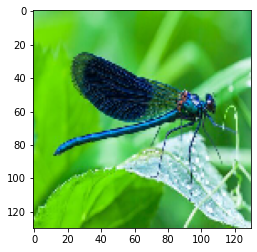

In [ ]:
img = keras.preprocessing.image.load_img(
    'D:\\dataset\\test\\libelulaTestv2.jpg', target_size=(130, 130)
)

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(class_names[np.argmax(score)])
print("{:.2f}%".format(100 * np.max(score)))

x = image.img_to_array(img)
print(type(x))
print(x.shape)
plt.imshow(x/255.)

In [ ]:
model.save('projetoUsandoTransferLearning.pth')

INFO:tensorflow:Assets written to: projetoUsandoTransferLearning.pth\assets
